In [3]:
import sys
#sys.path.append('../alibi/explainers/counterfactual/')
import logging
logging.basicConfig(level=logging.DEBUG)
import pandas as pd
import numpy as np
from scipy.spatial.distance import cityblock
from scipy.optimize import minimize
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from alibi.explainers import CounterFactualAdversarialSearch
from matplotlib.pyplot import imshow
import importlib
#sys.path.append('../alibi/explainers/counterfactual/')
#import cf_adversarial as counterfactuals
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


---

# Mnist

I0408 14:29:04.217362 140735836812160 _base.py:2515] update_title_pos
I0408 14:29:04.231672 140735836812160 font_manager.py:1254] findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/Gigio/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
I0408 14:29:04.257077 140735836812160 _base.py:2515] update_title_pos
I0408 14:29:04.285659 140735836812160 _base.py:2515] update_title_pos
I0408 14:29:04.311816 140735836812160 _base.py:2515] update_title_pos
I0408 14:29:04.327574 140735836812160 _base.py:2515] update_title_pos


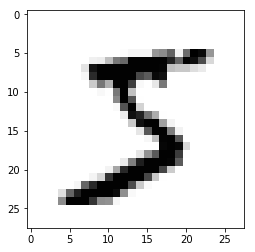

In [4]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
imshow(x_train[0],cmap='Greys')

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
initial_instace = np.random.permutation(x_train)[:1]

input = tf.keras.Input(shape=(28,28,1),name='input_part')
out=tf.keras.layers.Conv2D(32, (5, 5), activation='relu')(input)
out=tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(out)
out=tf.keras.layers.Dropout(0.2)(out)
out=tf.keras.layers.Flatten()(out)
out=tf.keras.layers.Dense(128, activation='relu')(out)
out=tf.keras.layers.Dense(10,activation='softmax')(out)

model = tf.keras.Model(input, out)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0408 14:29:07.074733 140735836812160 deprecation.py:506] From /Users/Gigio/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1257: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
model.fit(x_train,tf.keras.utils.to_categorical(y_train),epochs=2)

Epoch 1/2
60000/60000 [==============================] - 16s 274us/sample - loss: 0.1352 - acc: 0.9606
Epoch 2/2
60000/60000 [==============================] - 19s 323us/sample - loss: 0.0493 - acc: 0.9847


### Minimization

In [7]:
X=x_train[54]
X.shape

(28, 28, 1)

In [19]:
import alibi.explainers.counterfactual.cf_adversarial as counterfactuals

In [124]:
importlib.reload(counterfactuals)

<module 'alibi.explainers.counterfactual.cf_adversarial' from '/Users/Gigio/Desktop/git/fork-alibi/alibi/explainers/counterfactual/cf_adversarial.py'>

In [125]:
model.predict(X.reshape((1,)+X.shape))

array([[1.1420827e-10, 1.0617840e-07, 6.9988083e-08, 1.0176440e-05,
        1.2435452e-02, 9.8999976e-07, 1.7569269e-12, 4.3955473e-03,
        9.2290936e-04, 9.8223478e-01]], dtype=float32)

In [126]:
np.argmax(model.predict(X.reshape((1,)+X.shape)))

9

In [127]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
cf = counterfactuals.CounterFactualAdversarialSearch(model.predict,
                                                     target_class=4,target_probability=1.0,
                                                     maxiter=200, initial_lam=0, final_lam=0.01, lam_how='adiabatic',
                                                    lr=10)
cf.fit(x_train,y_train)

In [132]:
expl=cf.explain(X, nb_instances=1,initialization=None)

I0408 15:14:34.109055 140735836812160 cf_adversarial.py:263] Starting minimization
I0408 15:14:34.269900 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:34.273211 140735836812160 cf_adversarial.py:104] Proba: 1.0


init is none


I0408 15:14:34.432443 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:34.436082 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:14:34.598999 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:34.601943 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:14:34.761479 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:34.764475 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:14:34.920355 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:34.923579 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:14:35.078097 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:35.081321 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:14:35.237734 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:35.240962 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:14:35.396411 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:35.399405 1407358

I0408 15:14:44.233182 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:44.237456 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:14:44.451136 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:44.455049 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:14:44.669070 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:44.673414 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:14:44.896901 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:44.900536 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:14:45.114968 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:45.118443 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:14:45.338541 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:45.342329 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:14:45.557037 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:45.560569 1407358

I0408 15:14:56.162927 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:56.166736 140735836812160 cf_adversarial.py:104] Proba: 0.9999563694000244
I0408 15:14:56.397831 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:56.401680 140735836812160 cf_adversarial.py:104] Proba: 0.9966756105422974
I0408 15:14:56.633808 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:56.638131 140735836812160 cf_adversarial.py:104] Proba: 0.8738682866096497
I0408 15:14:56.870846 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:56.874582 140735836812160 cf_adversarial.py:104] Proba: 0.9999998807907104
I0408 15:14:57.106560 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:57.110284 140735836812160 cf_adversarial.py:104] Proba: 0.9999938011169434
I0408 15:14:57.346108 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:14:57.349896 140735836812160 cf_adversarial.py:104] Proba: 0.9994671940803528
I0408 15:14:57.5

I0408 15:15:08.908797 140735836812160 cf_adversarial.py:104] Proba: 0.9986786246299744
I0408 15:15:09.198768 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:15:09.203141 140735836812160 cf_adversarial.py:104] Proba: 0.6935998797416687
I0408 15:15:09.519495 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:15:09.524055 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:15:09.811233 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:15:09.816631 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:15:10.109705 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:15:10.114184 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:15:10.404933 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:15:10.409307 140735836812160 cf_adversarial.py:104] Proba: 1.0
I0408 15:15:10.700716 140735836812160 cf_adversarial.py:103] Target class: 4
I0408 15:15:10.705403 140735836812160 cf_adversarial.py:104] Proba: 0.999998

In [133]:
x_min=cf.cf_instances['vector'][0]

[[1.1420827e-10 1.0617840e-07 6.9988083e-08 1.0176440e-05 1.2435452e-02
  9.8999976e-07 1.7569269e-12 4.3955473e-03 9.2290936e-04 9.8223478e-01]]


I0408 15:15:58.974288 140735836812160 _base.py:2515] update_title_pos
I0408 15:15:59.006496 140735836812160 _base.py:2515] update_title_pos
I0408 15:15:59.035305 140735836812160 _base.py:2515] update_title_pos
I0408 15:15:59.062095 140735836812160 _base.py:2515] update_title_pos
I0408 15:15:59.077378 140735836812160 _base.py:2515] update_title_pos


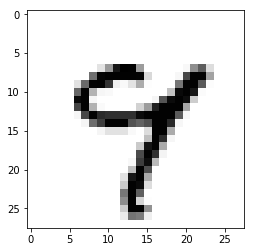

In [134]:
print(model.predict(X.reshape((1,)+X.shape)))
imshow(X.reshape(28,28),cmap='Greys')

[[0.0000000e+00 2.4597594e-28 1.6178954e-35 0.0000000e+00 1.0000000e+00
  2.7857519e-36 1.3112133e-25 6.1637452e-28 8.2081678e-29 0.0000000e+00]]


I0408 15:15:59.566380 140735836812160 _base.py:2515] update_title_pos
I0408 15:15:59.598315 140735836812160 _base.py:2515] update_title_pos
I0408 15:15:59.626708 140735836812160 _base.py:2515] update_title_pos
I0408 15:15:59.650999 140735836812160 _base.py:2515] update_title_pos
I0408 15:15:59.664455 140735836812160 _base.py:2515] update_title_pos


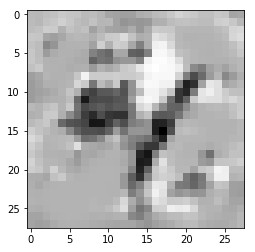

In [135]:
print(model.predict(x_min))
imshow(x_min.reshape(28,28),cmap='Greys')

In [ ]:
X.shape

In [41]:
len(cf.f_ranges)

784

In [46]:
initial_instace=np.random.uniform(low=[t[0] for t in cf.f_ranges],high=[t[1] for t in cf.f_ranges],size=X.flatten().shape).reshape(X.shape)

In [48]:
initial_instace.shape

(28, 28, 1)